# Who should be potentially promoted in the company?

## Content

### This time we use the dataset to achieve the goals as below:

- Data analytics: The conclusions as below
        
        - Sales&Marketing and Operations are the two departments which take big part in headcounts. Pay attention to the attrition and new hires.
        - Analytics,R&D,Sales&Marketing exclude those with below secondary education,it's recommend to look at the reasons.As it's against the company value: inclusiveness
        - currently the female employees accounted for 30% of total employees. We'll continue to improve the working conditions and well beings for all ,especially for female cus they are minority and we advocate equal employment and inclusiveness culture.
        - The average age is 35, employee ages between 30-40 is the majority , accounted for 52% of total.The young labor between 16-24 are not recruited much in the company,it's recommend to check the reasons, for example: is it the company not attractive for the young? or the recruitment team neglect them on purpose because of their unexperience? or the organisation design provide less job opportunities for this age group? etc
        - We assume other means the third party recruitment, like outsourcing/headhunters. From the chart below, it displays that the company heavily counts on others to refill the position.
             For the urgent and important position recruitment, if the response from other is quicker than sourcing,and the recruitment cost under control, it's not bad way as supplementary to sourcing.
             However, meanwhile it's recommend to 
                    1. continously enhance the recruitemnt ability inside in case other out of control , for example, beyond recruitment cost or delay response time.
                    2. develop more third parties to gain the best market price from the vendors
                    3. evaluate the recruitment process and quality to ensure the best talent would be hired under the conditions.
                    
        - We can spot that Procurement/Sales&Marketing/Technology are more interesting in various courses to opt in and expand their horizon. Meanwhile, HR/Legal/Analytics are inclined to in depth of knowledge and professional as they focus on less courses.Therefore, it's recommend to develop courses under the conditions:
    1. offer more elementery/intermidiate courses against those employees who prefer a variety of courses.
    2. offer best and advanced courses against those employees who plan to hone their skills and gain in depth knowledge.
    3. identify who are willing to learn and spend more time on the courses,maybe customized courses is required for the potential successors

      - We can see Analytics and Technology gain the best training score, that means they are better to absorb the knowledge and achieve the learning targets.
      - It tells us that wining awards is not associated with the length of service, which means, there are no awards to highlight the loyality to the company.It's hard to say it will make good or bad impact on the company in the long run, if focus on outstanding performance/special contribution to team only currently.For the newly hired at young age who work in the company for several years and become fit for the work role, it's recommend to courage loyality and incentise them via awards.The next step is to research the reasons why the rest departments couldn't achieve the learning goals. Is it the course difficult or boring for the learner? or Is the learner not proactive to study the course? etc.
      - The training is helpful for the Sales&Market/Procurement/Technology,as their performance improved along with the training score,especially Sales&Marketing.For the rest departments, we probably introduce other ways to improve performance as training didn't much helpful to them.
      - Which factors determine the promotion of an employee? 
          1. KPI must be above 80% 
          2. Average training score must be excellent 
          3.Gain awards as much as possible in the company.
      
      
- Linear Regression Model: to predict who should be potentially promoted in the company. For the HR practices in most business, it's not economical to build up large and complicated model to predict something related to human resource management, as the more complicated model, the higher cost required. What's more, model prediction for HR and managers is mainly for a reference when making decisions or judgement, we should consider the model prediction but we shouldn't count on them only. 
    The model prediction performance: linear regression model prediction accuracy is 91%, which means we can use linear regression to predict who should be potentially promoted on the basis of : kpi assessment last year, training score,awards. It's good reference for managers and HR to consider the employees to be promoted.




In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read_csv('/kaggle/input/hr-analytics-classification/train_LZdllcl.csv')
glimpse(df)

Rows: 54808 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): department, region, education, gender, recruitment_channel
dbl (9): employee_id, no_of_trainings, age, previous_year_rating, length_of_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 54,808
Columns: 14
$ employee_id          <dbl> 65438, 65141, 7513, 2542, 48945, 58896, 20379, 16…
$ department           <chr> "Sales & Marketing", "Operations", "Sales & Marke…
$ region               <chr> "region_7", "region_22", "region_19", "region_23"…
$ education            <chr> "Master's & above", "Bachelor's", "Bachelor's", "…
$ gender               <chr> "f", "m", "m", "m", "m", "m", "f", "m", "m", "m",…
$ recruitment_channel  <chr> "sourcing", "other", "sourcing", "other", "other"…
$ no_of_trainings      <dbl> 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1…
$ age                  <dbl> 35, 30, 34, 39, 45, 31, 31, 33, 28, 32, 30, 35, 4…
$ previous_year_rating <dbl> 5, 5, 3, 1, 3, 3, 3, 3, 4, 5, NA, 5, 5, 3, 3, 1, …
$ length_of_service    <dbl> 8, 4, 7, 10, 2, 7, 5, 6, 5, 5, 1, 3, 5, 16, 7, 10…
$ `KPIs_met >80%`      <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1…
$ `awards_won?`        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ avg_training_

In [3]:
df %>% sapply(function(x)sum(is.na(x))) # check NA values

employee_id           department               region 
                   0                    0                    0 
           education               gender  recruitment_channel 
                2409                    0                    0 
     no_of_trainings                  age previous_year_rating 
                   0                    0                 4124 
   length_of_service        KPIs_met >80%          awards_won? 
                   0                    0                    0 
  avg_training_score          is_promoted 
                   0                    0

In [4]:
df <- df %>% drop_na() 
dim(df) # drop NA

[1] 48660    14

In [5]:
fig <- function(width,height){
    options(repr.plot.width=width,repr.plot.height=height)
} # set figure function

In [6]:
fig(20,15) # adjust figure size

### Headcounts by Department

#### Sales&Marketing and Operations are the two departments which take big part in headcounts. Pay attention to the attrition and new hires.

numeric(0)

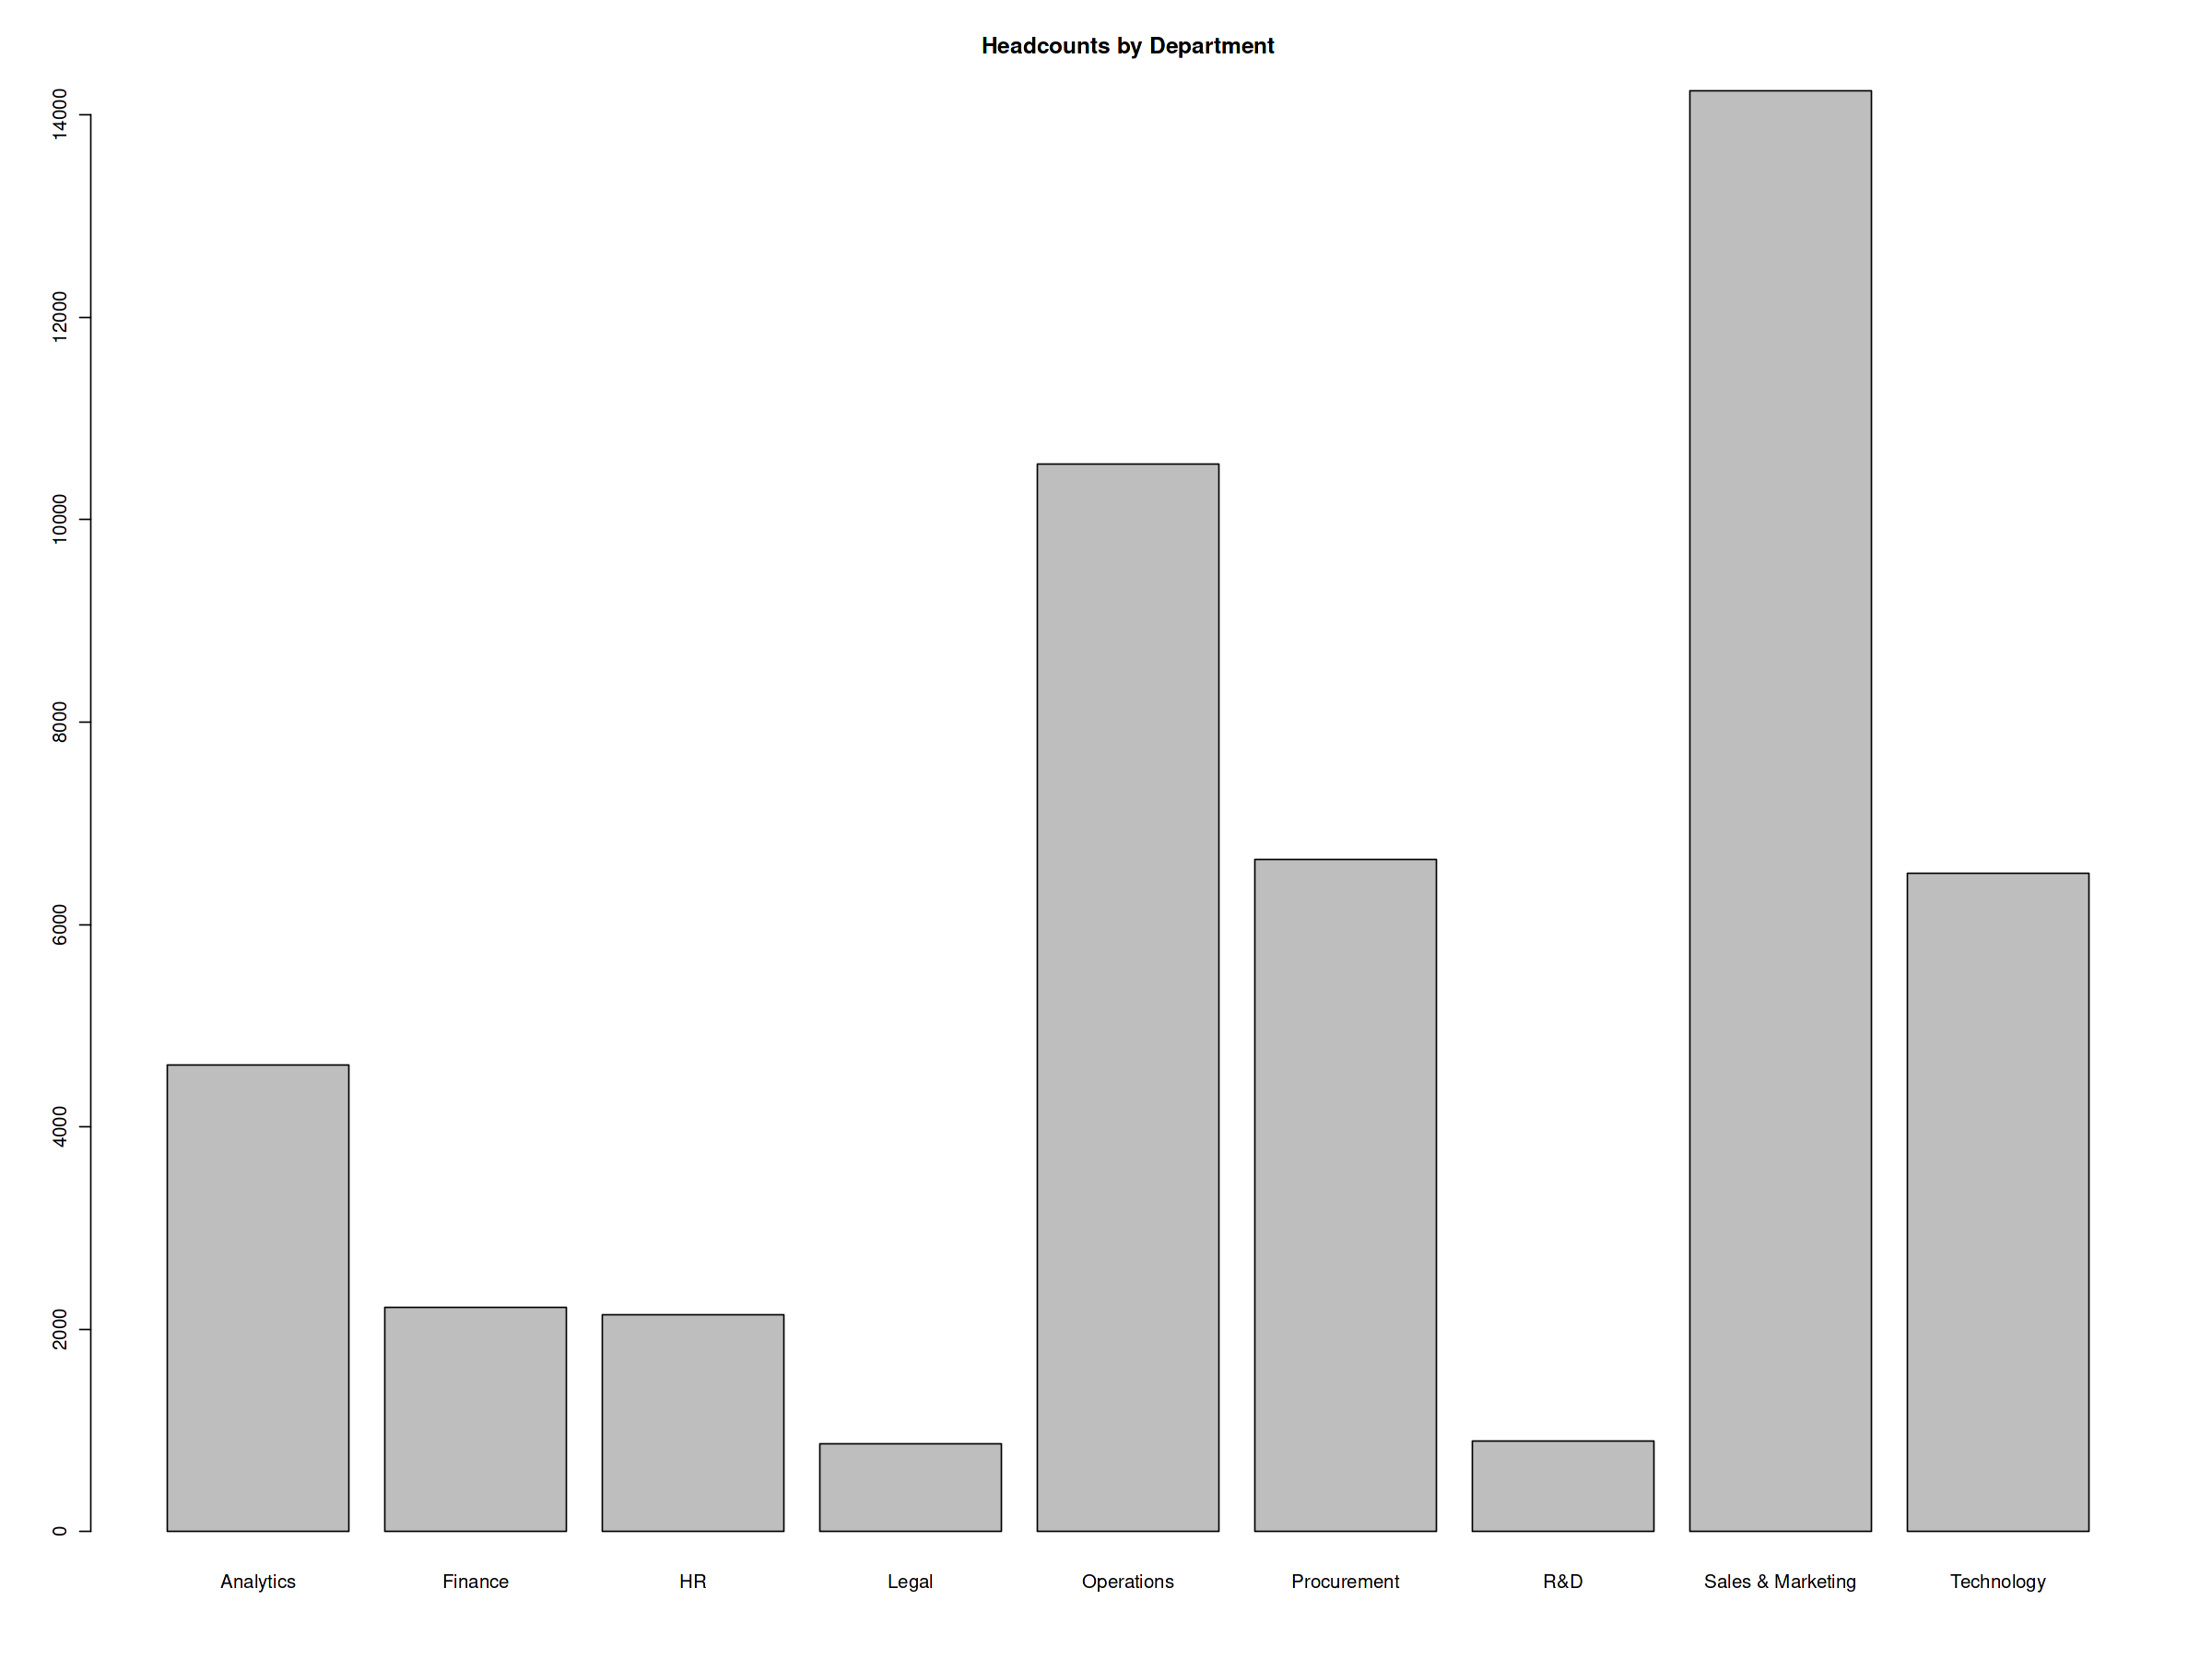

In [7]:
barplot(table(df$department))+title('Headcounts by Department')  # service-oriented company ,along with sales-driven,

### Headcounts by Education

#### why analytics,R&D,Sales&Marketing exclude those with below secondary education? 如果企业文化提倡兼容并包、平等对待企业里每一成员的话，按理说，学历分布情况应该是各个部门
#### 都有学历差异且多元化，但是唯独有三个部门排除了非大学者，需要调查这种情况存在的原因

`summarise()` has grouped output by 'department'. You can override using the
`.groups` argument.


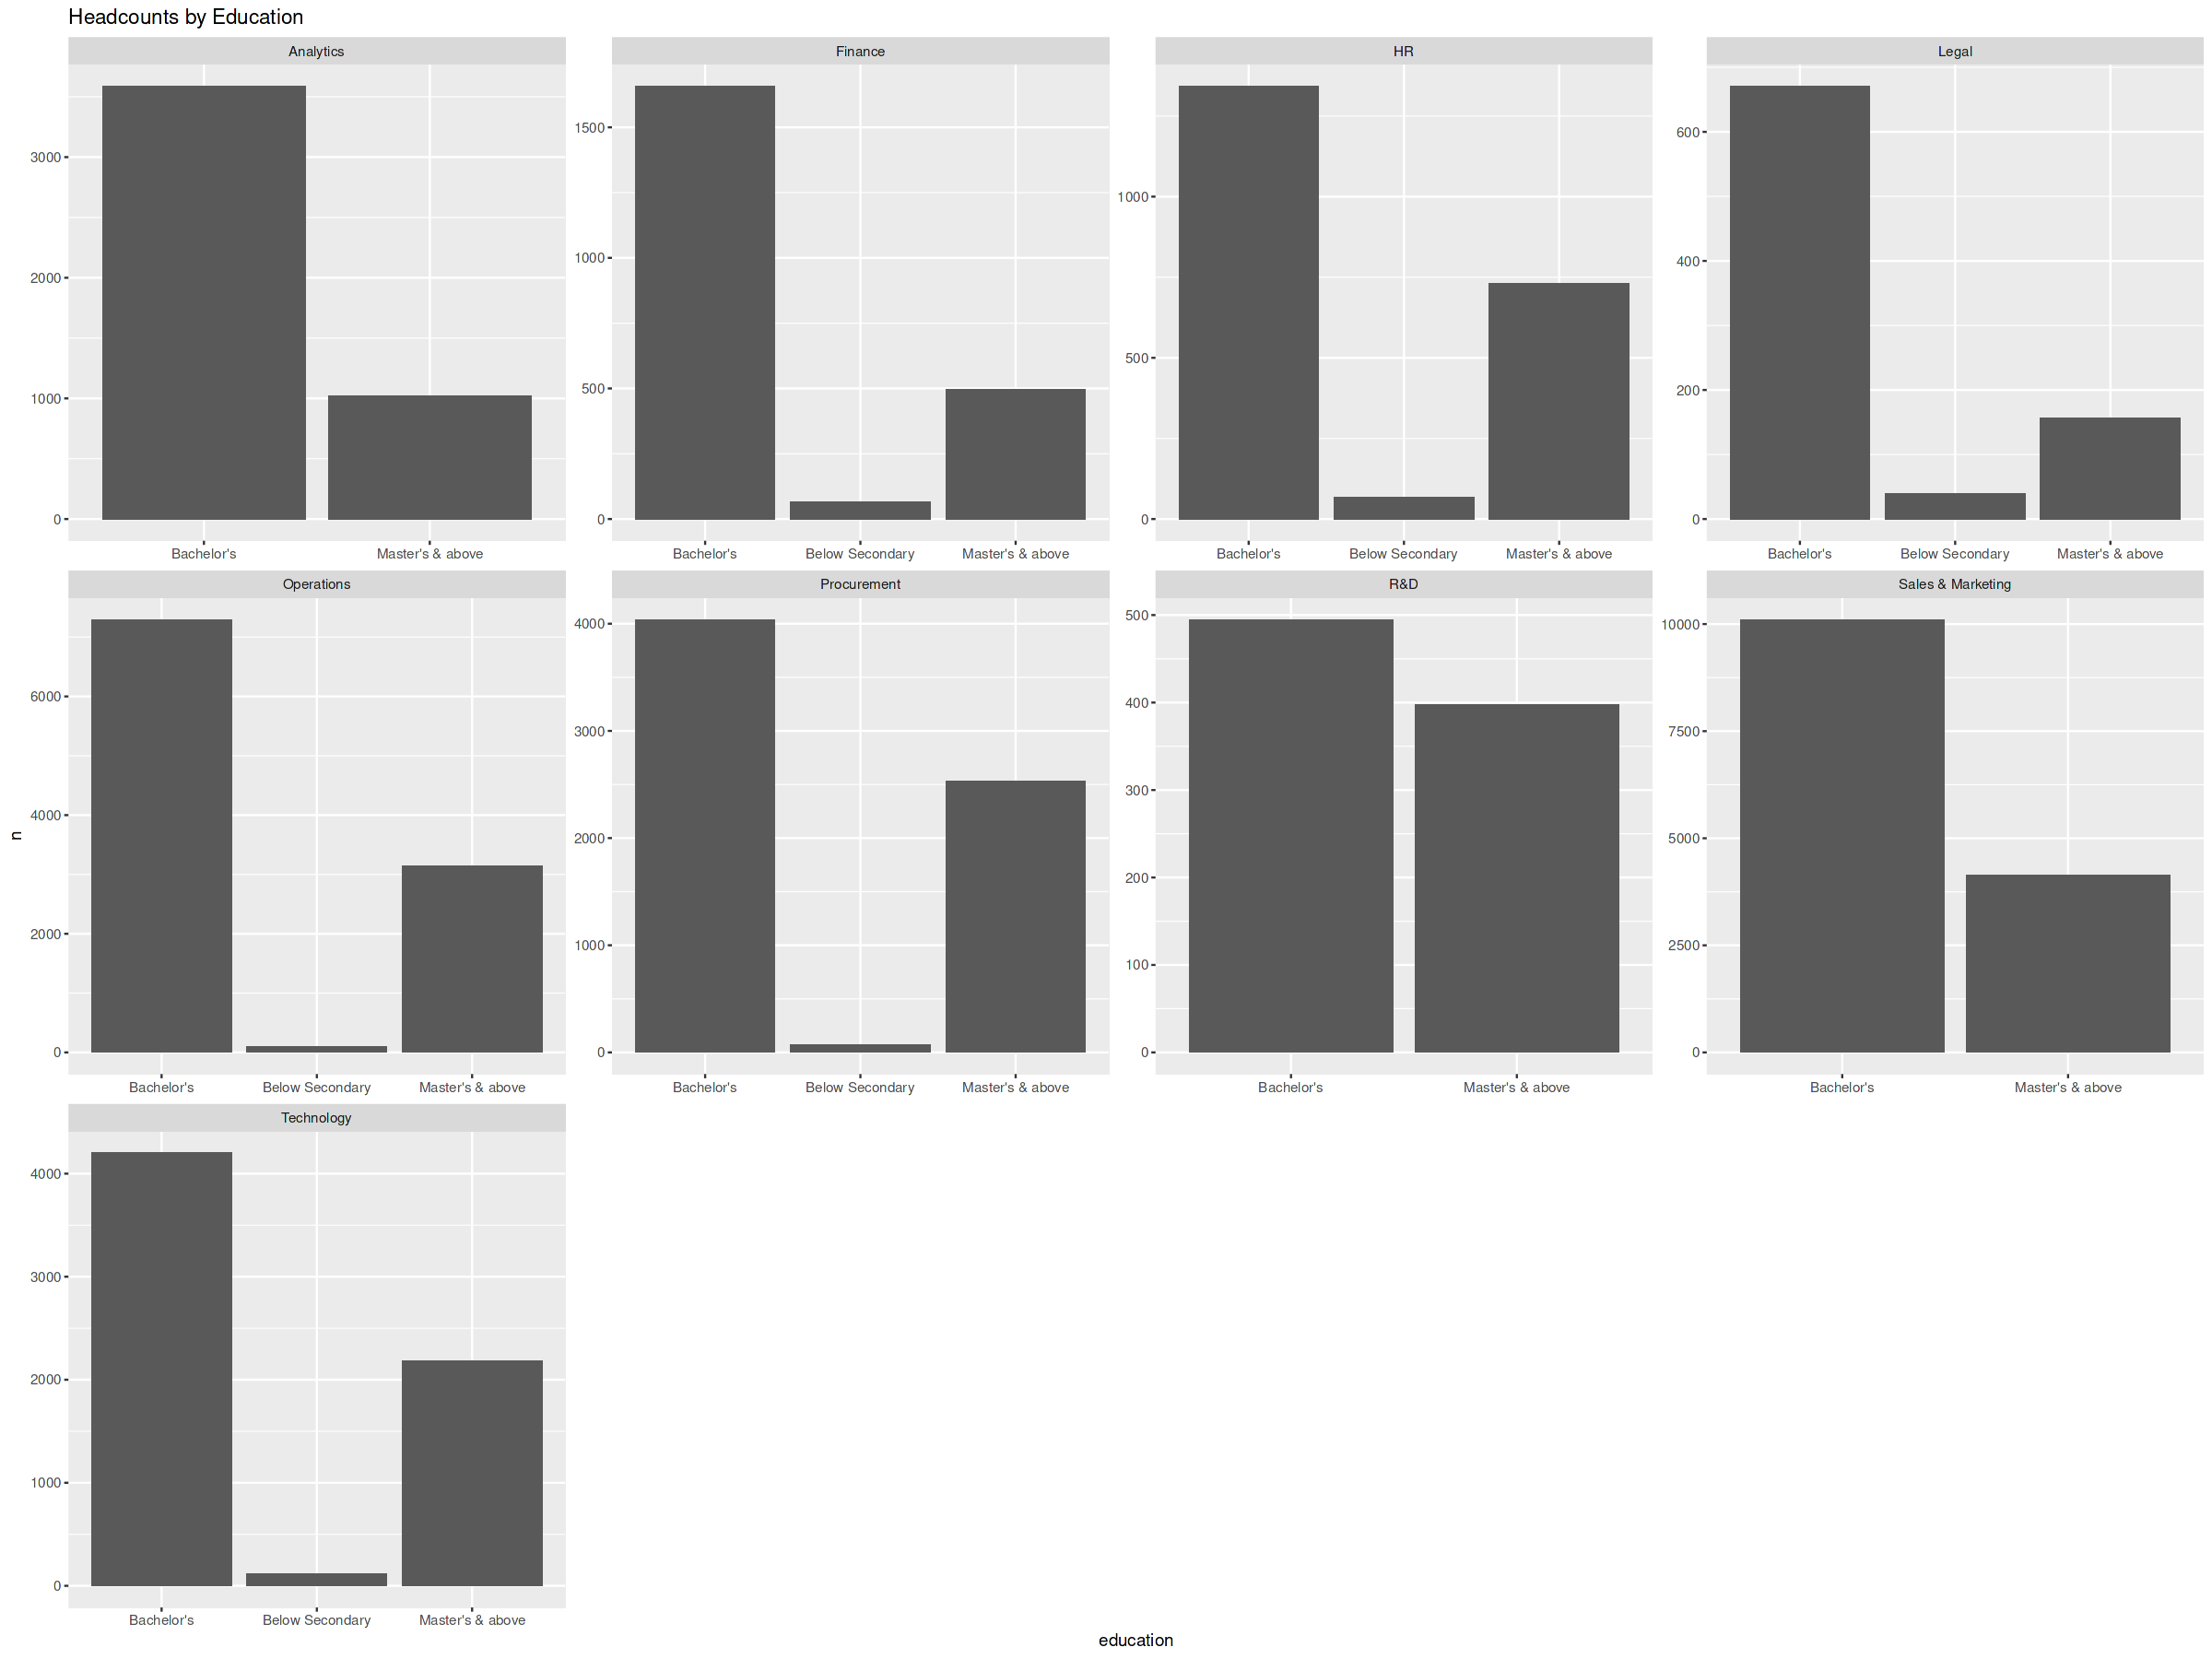

In [8]:
df %>% group_by(department,education) %>% summarize(n=n()) %>% ggplot(aes(education,n))+geom_col()+facet_wrap(c('department'),ncol=4,scales='free')+labs(title='Headcounts by Education')
# why analytics,R&D,Sales&Marketing exclude those with below secondary education? 如果企业文化提倡兼容并包、平等对待企业里每一成员的话，按理说，学历分布情况应该是各个部门
# 都有学历差异且多元化，但是唯独有三个部门排除了非大学者，需要调查这种情况存在的原因

### Headcounts by Gender

#### currently the female employees accounted for 30% of total employees. We'll continue to improve the working conditions and well beings for all ,especially for female cus they are minority and we advocate equal employment and inclusiveness culture.

gender,n,pct
<chr>,<int>,<dbl>
f,14808,0.3
m,33852,0.7


`summarise()` has grouped output by 'department'. You can override using the
`.groups` argument.


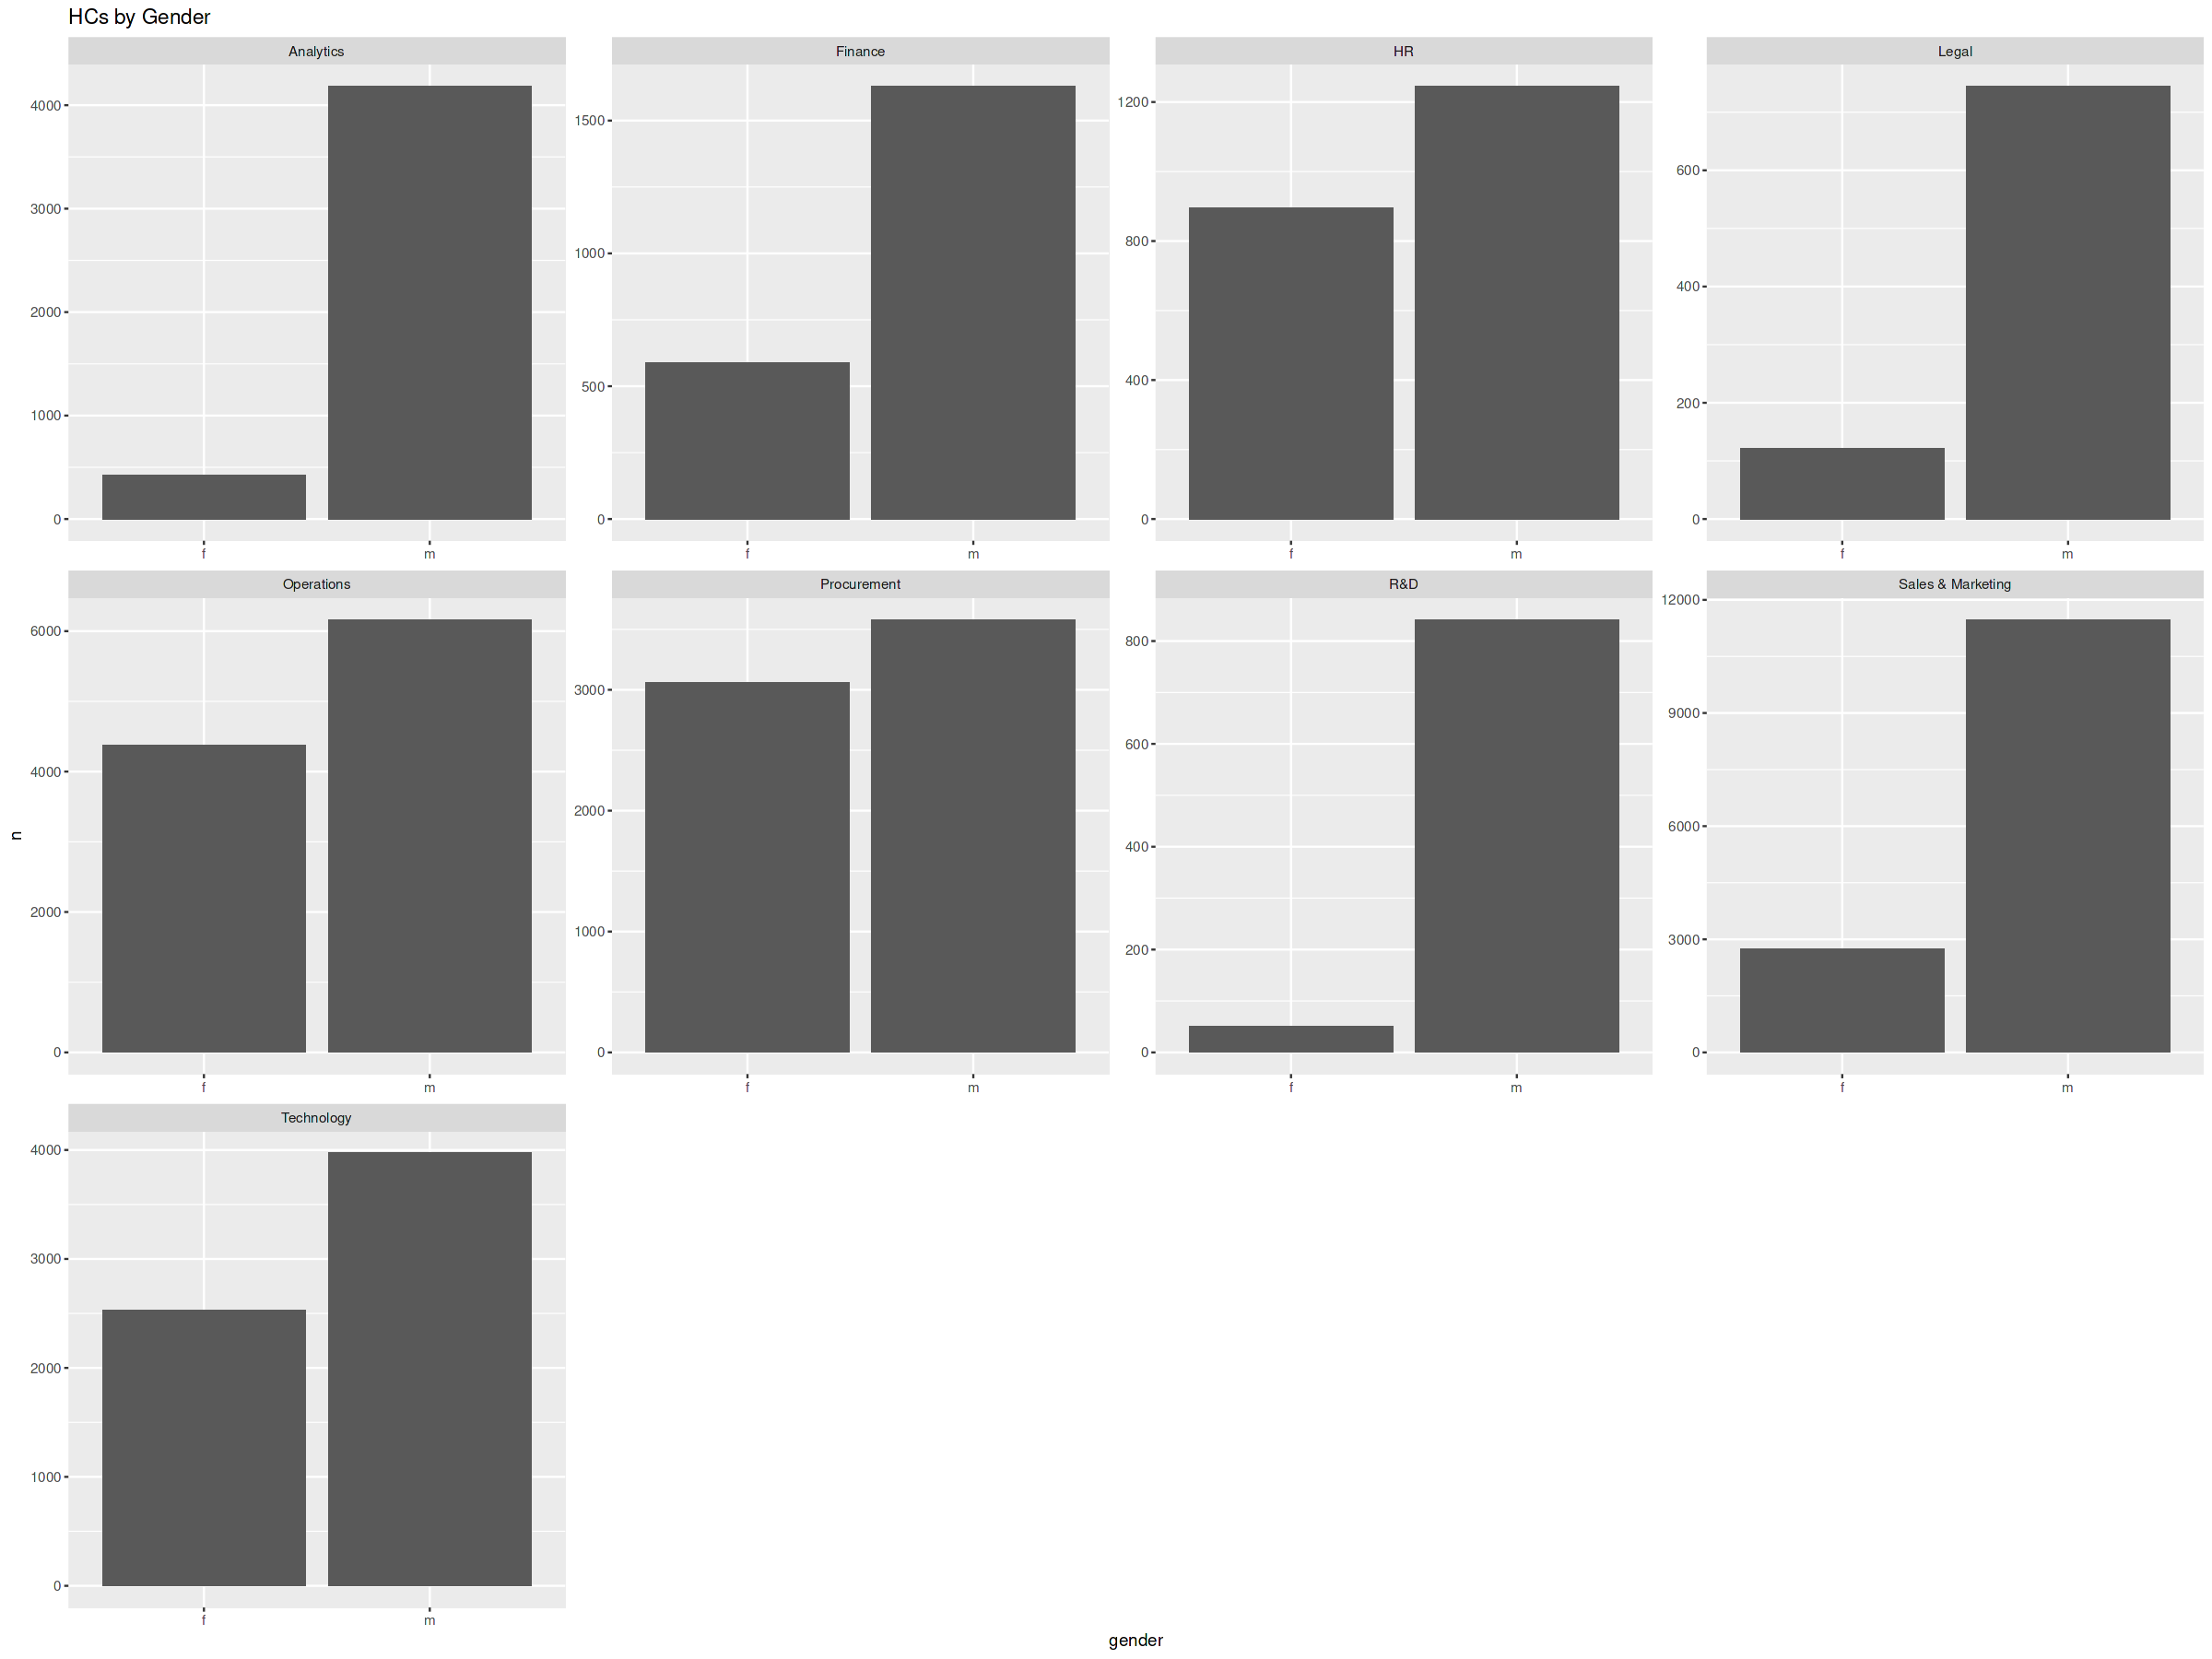

In [9]:
df %>% group_by(gender) %>% summarize(n=n(),'pct'=round(n/nrow(df),2))
df %>% group_by(department,gender) %>% summarize(n=n()) %>% ggplot(aes(gender,n))+geom_col()+facet_wrap(c('department'),ncol=4,scales='free')+labs(title='HCs by Gender')
# currently the female employees accounted for 30% of total employees. We'll continue to improve the working conditions and well beings for all ,especially for female cus they are minority and we advocate equal employment and inclusiveness culture.

### Headcounts by Age Group

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   30.00   34.00   35.59   39.00   60.00 

ageGroup,n,pct
<fct>,<int>,<dbl>
"(16,24]",670,0.01
"(24,30]",12505,0.26
"(30,40]",25095,0.52
"(40,60]",10390,0.21


`summarise()` has grouped output by 'department'. You can override using the
`.groups` argument.


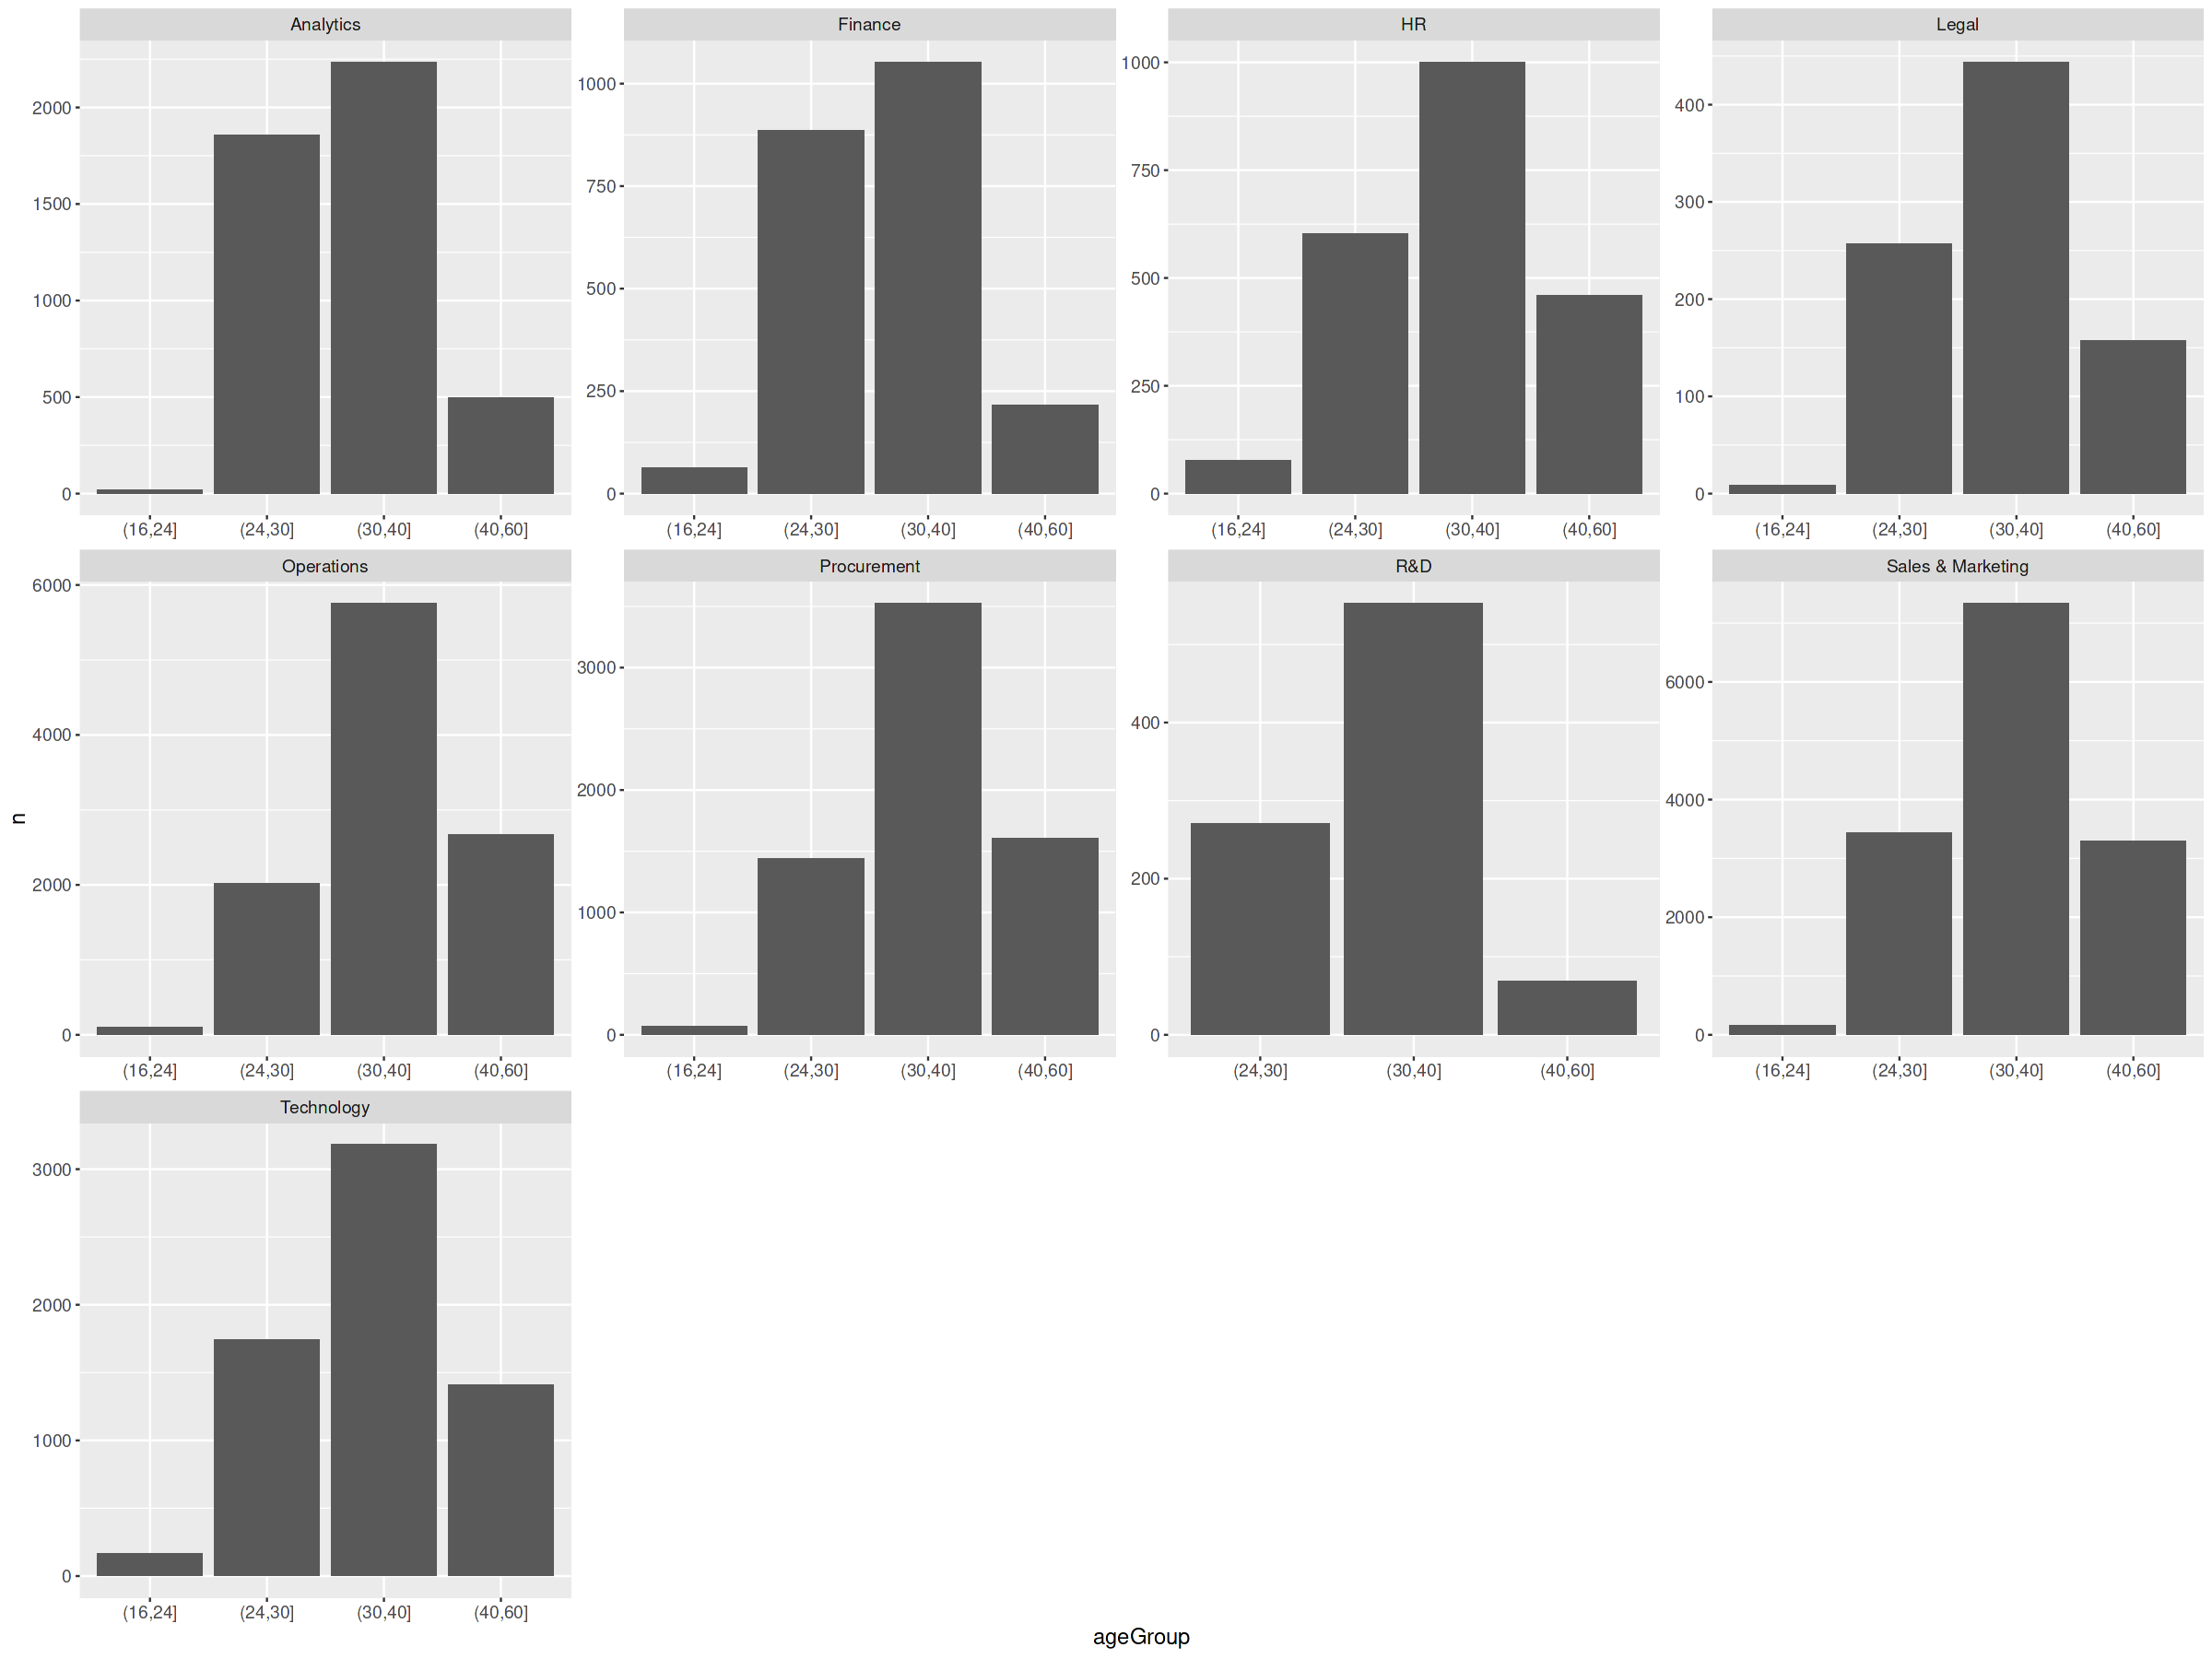

In [10]:
summary(df$age)
df %>% mutate('ageGroup'=cut(age,breaks=c(0,16,24,30,40,60))) %>% group_by(ageGroup) %>% summarize(n=n(),'pct'=round(n/nrow(df),2))
df %>% mutate('ageGroup'=cut(age,breaks=c(0,16,24,30,40,60))) %>% group_by(department,ageGroup) %>% summarize(n=n()) %>%
ggplot(aes(ageGroup,n))+geom_col()+facet_wrap(c('department'),ncol=4,scales='free')+theme(text=element_text(size=14)) 
# The average age is 35, employee ages between 30-40 is the majority , accounted for 52% of total
# The young labor between 16-24 are not recruited much in the company,it's recommend to check the reasons, for example: is it the company not attractive for the young? or the recruitment team neglect them on purpose because of their unexperience? or the organisation design provide less job opportunities for this age group? etc
#公司整体员工平均年龄在35岁，公司以中年员工均多，即30-40岁为主体生产力，占比为52%。
# 对16-24岁的年轻人从劳动力市场上吸纳的并不多，建议忧化员工年龄结构配置，使企业的活力与稳固之间能达动态平衡，既要注意补充新鲜劳动力注入企业发展，又要沉淀和巩固现有壮年生产力，同时让有经验的员工培育新员工，使企业新陈代谢处于良性循环

`summarise()` has grouped output by 'department'. You can override using the
`.groups` argument.


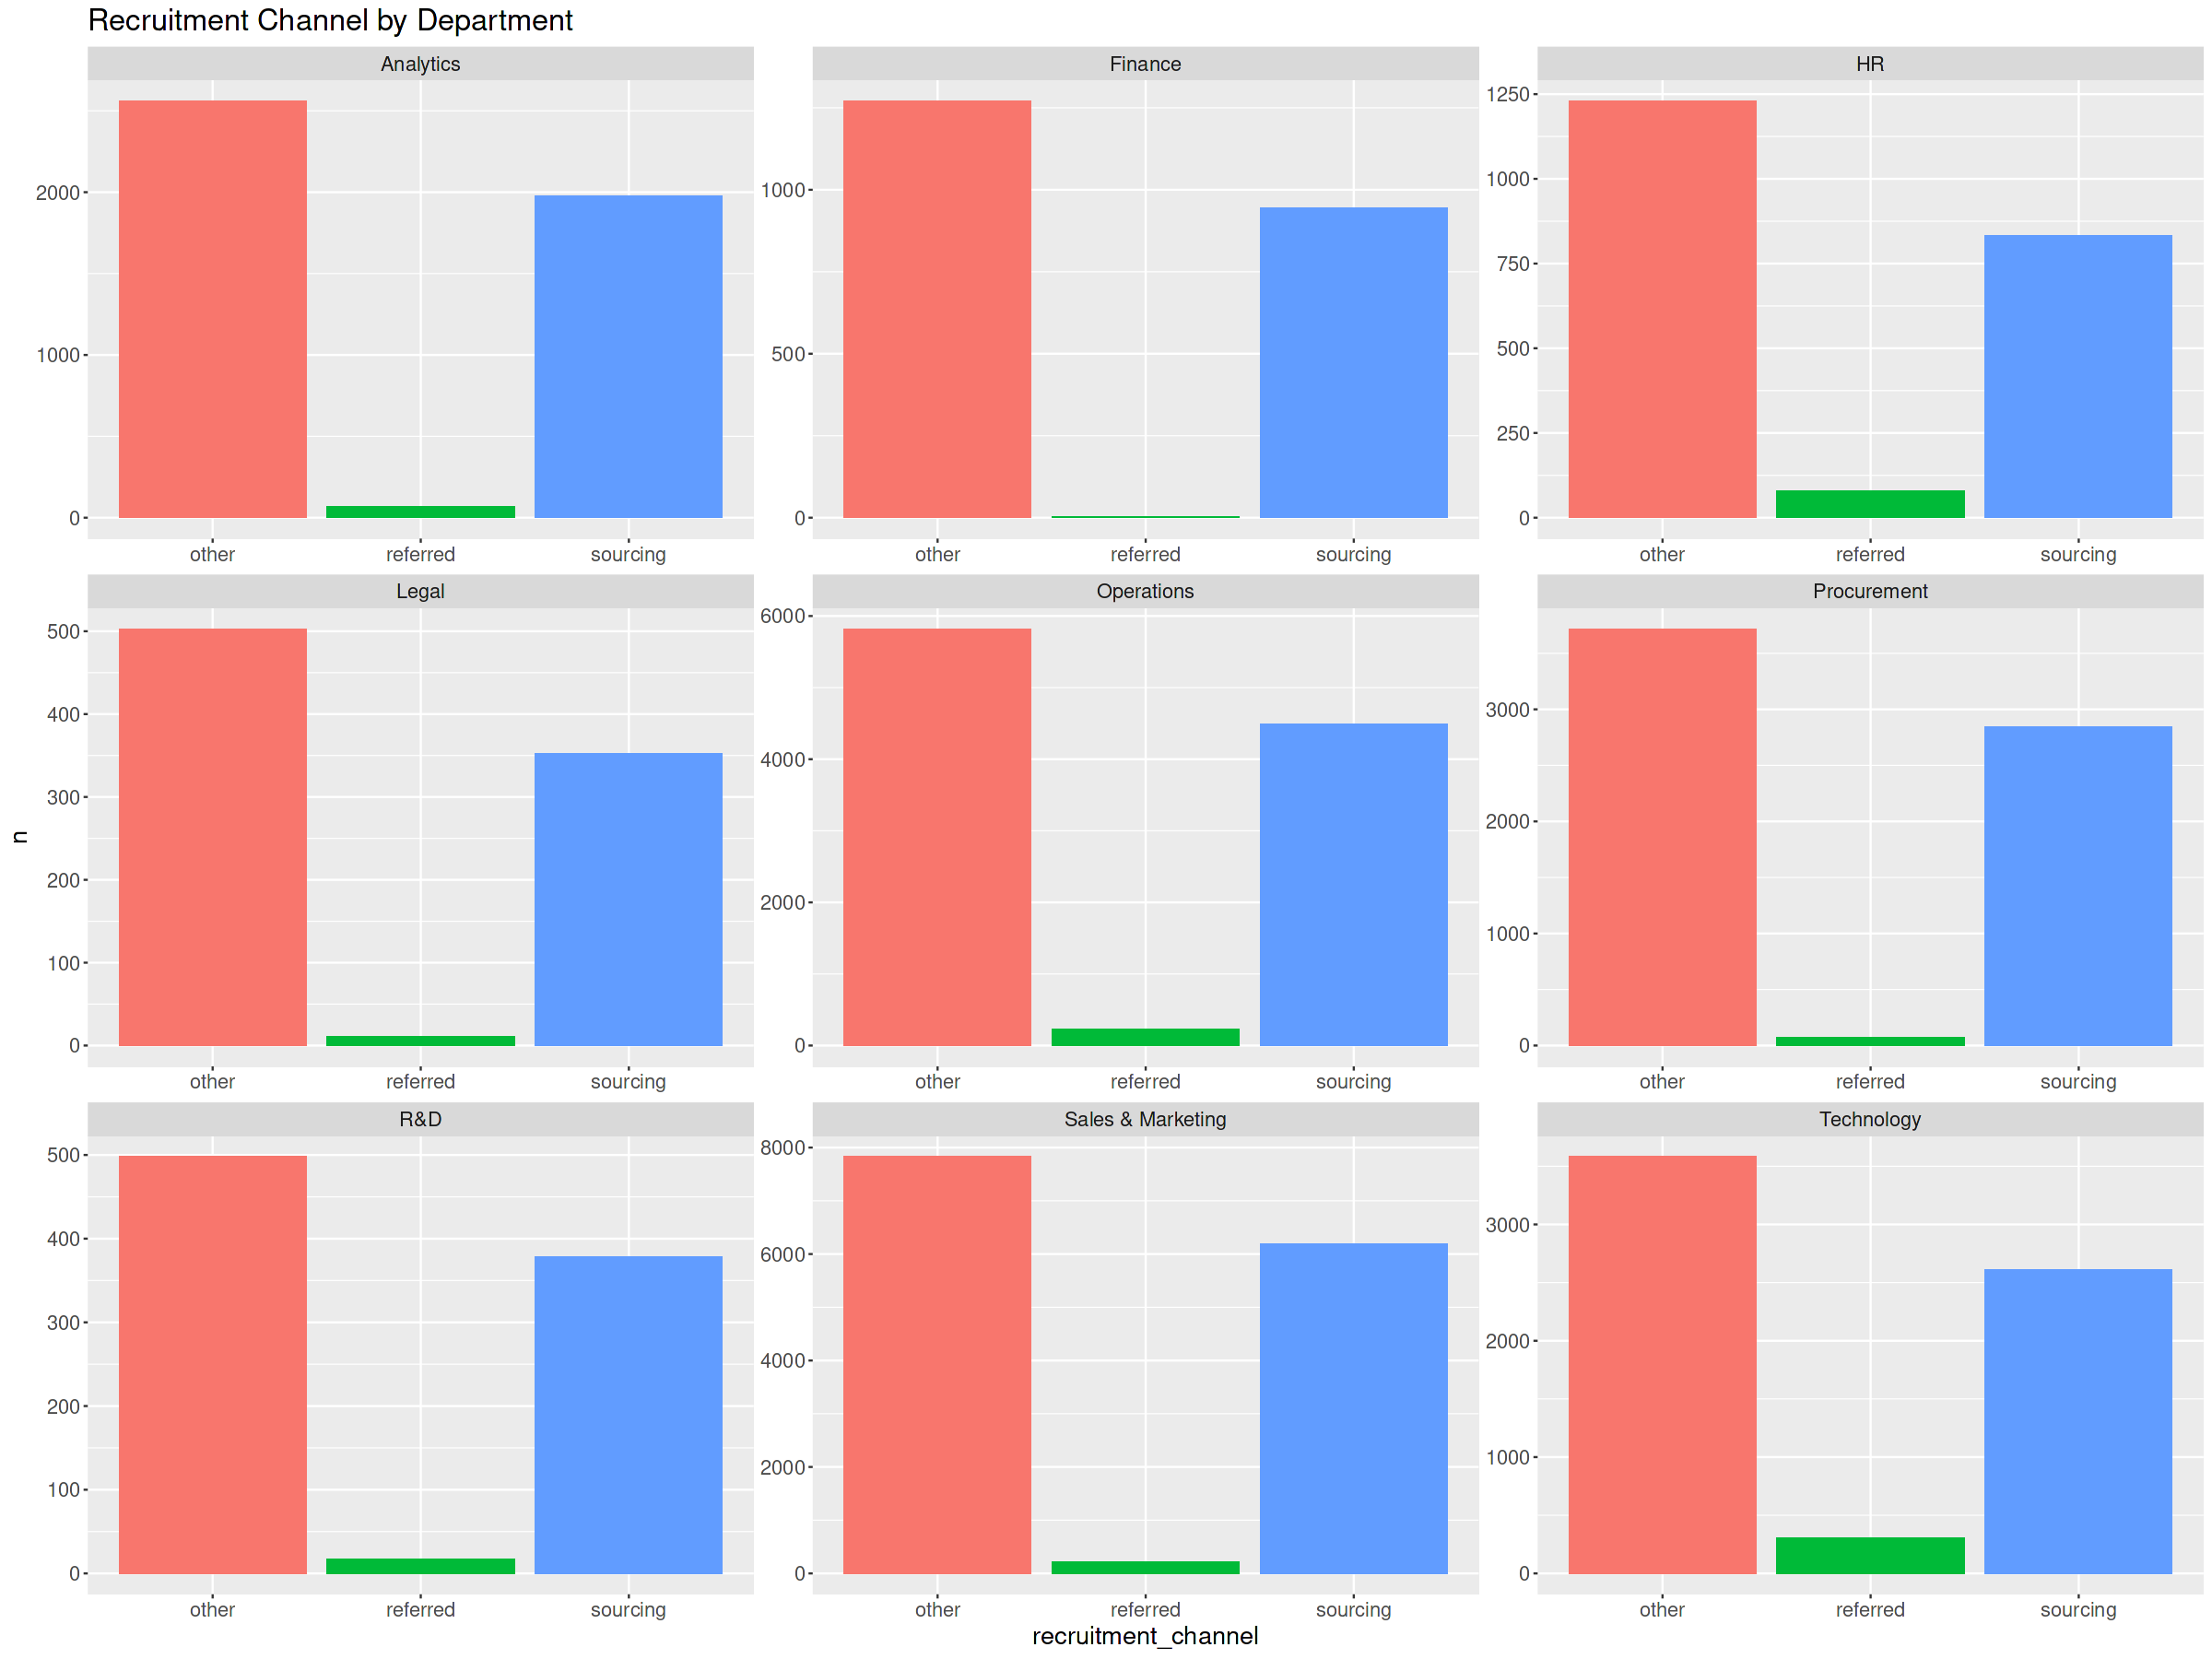

In [11]:
df %>% group_by(department,recruitment_channel) %>% summarize(n=n()) %>% 
ggplot(aes(recruitment_channel,n,fill=factor(recruitment_channel)))+geom_col()+facet_wrap('department',ncol=3,scales='free')+theme(text=element_text(size=16),legend.position='none')+
labs(title='Recruitment Channel by Department')
# We assume other means the third party recruitment, like outsourcing/headhunters. From the chart below, it displays that the company heavily counts on others to refill the position.
# For the urgent and important position recruitment, if the response from other is quicker than sourcing,and the recruitment cost under control, it's not bad way as supplementary to sourcing.
# However, meanwhile it's recommend to 
# 1. continously enhance the recruitemnt ability inside in case other out of control , for example, beyond recruitment cost or delay response time.
# 2. develop more third parties to gain the best market price from the vendors
# 3. evaluate the recruitment process and quality to ensure the best talent would be hired under the conditions.

`summarise()` has grouped output by 'department'. You can override using the
`.groups` argument.


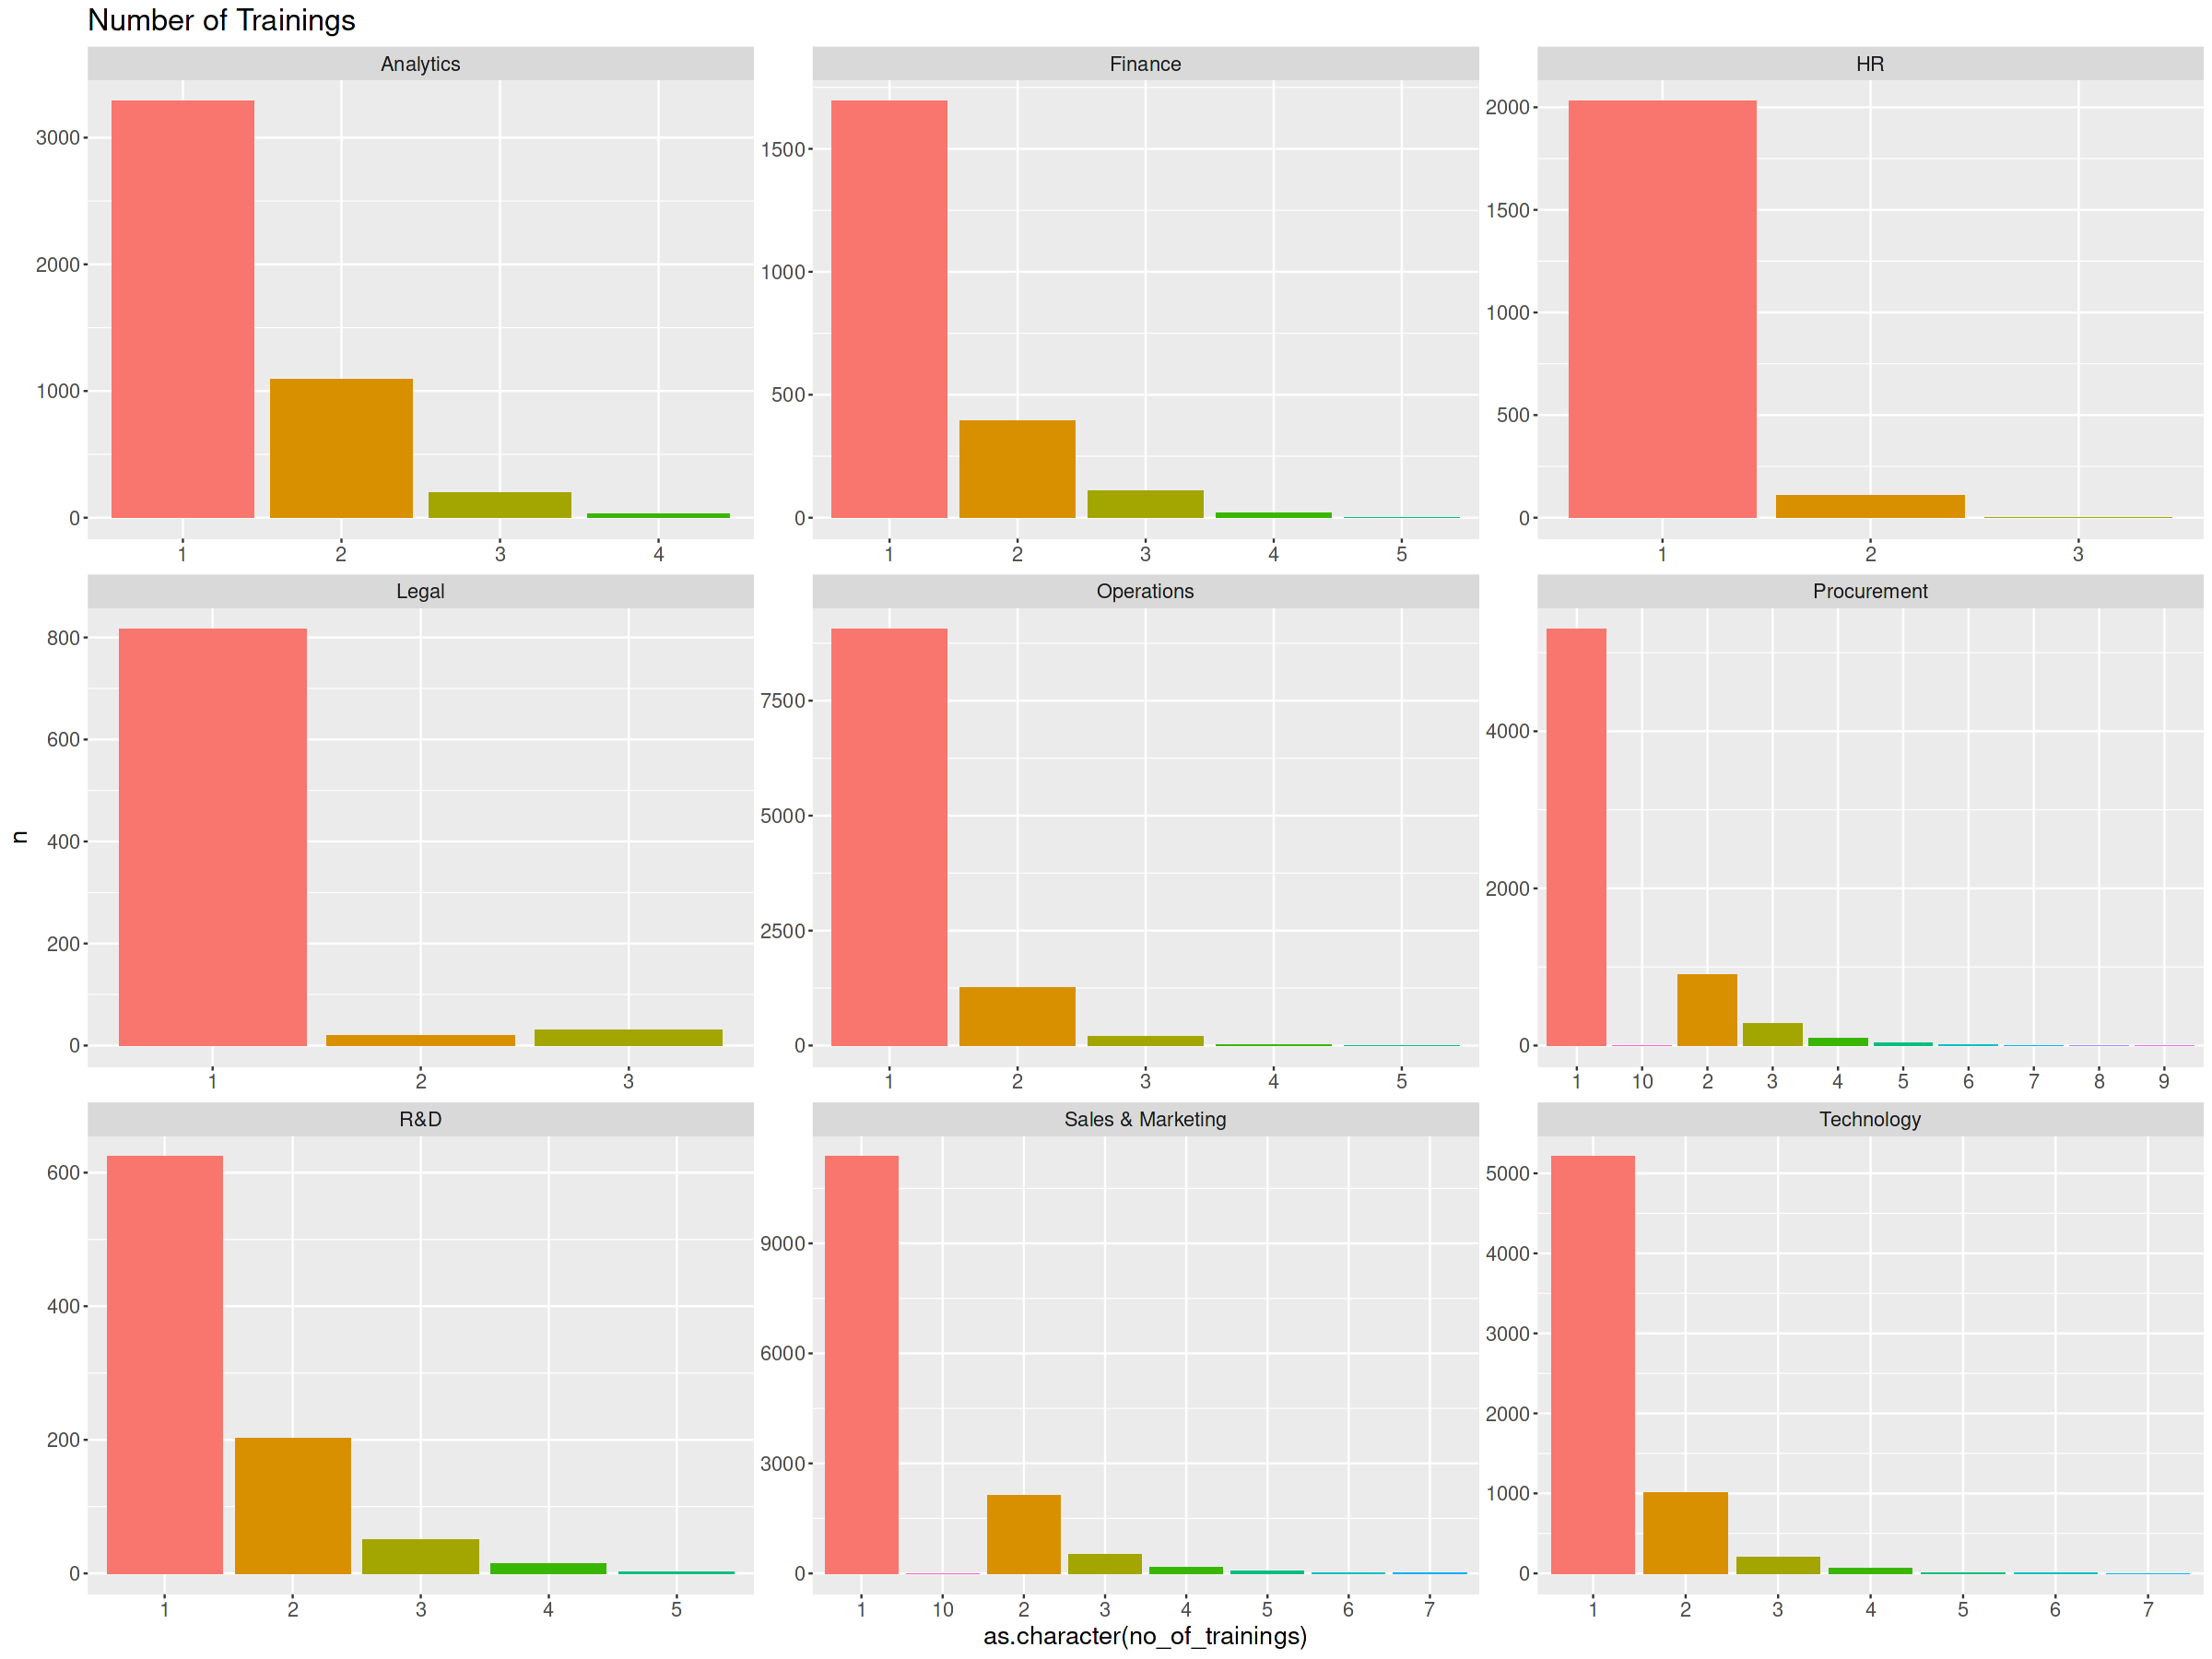

In [12]:
df %>% group_by(department,`no_of_trainings`) %>% summarize(n=n()) %>%
ggplot(aes(as.character(no_of_trainings),n,fill=factor(no_of_trainings)))+geom_col()+theme(text=element_text(size=16),legend.position='none')+
labs(title='Number of Trainings')+facet_wrap('department',ncol=3,scales='free')
# We can spot that Procurement/Sales&Marketing/Technology are more interesting in various courses to opt in and expand their horizon. 
# Meanwhile, HR/Legal/Analytics are inclined to in depth of knowledge and professional as they focus on less courses.
# Therefore, it's recommend to develop courses under the conditions
# 1. offer more elementery/intermidiate courses against those employees who prefer a variety of courses.
# 2. offer best and advanced courses against those employees who plan to hone their skills and gain in depth knowledge.
# 3. identify who are willing to learn and spend more time on the courses,maybe customized courses is required for the potential successors

`summarise()` has grouped output by 'department'. You can override using the
`.groups` argument.


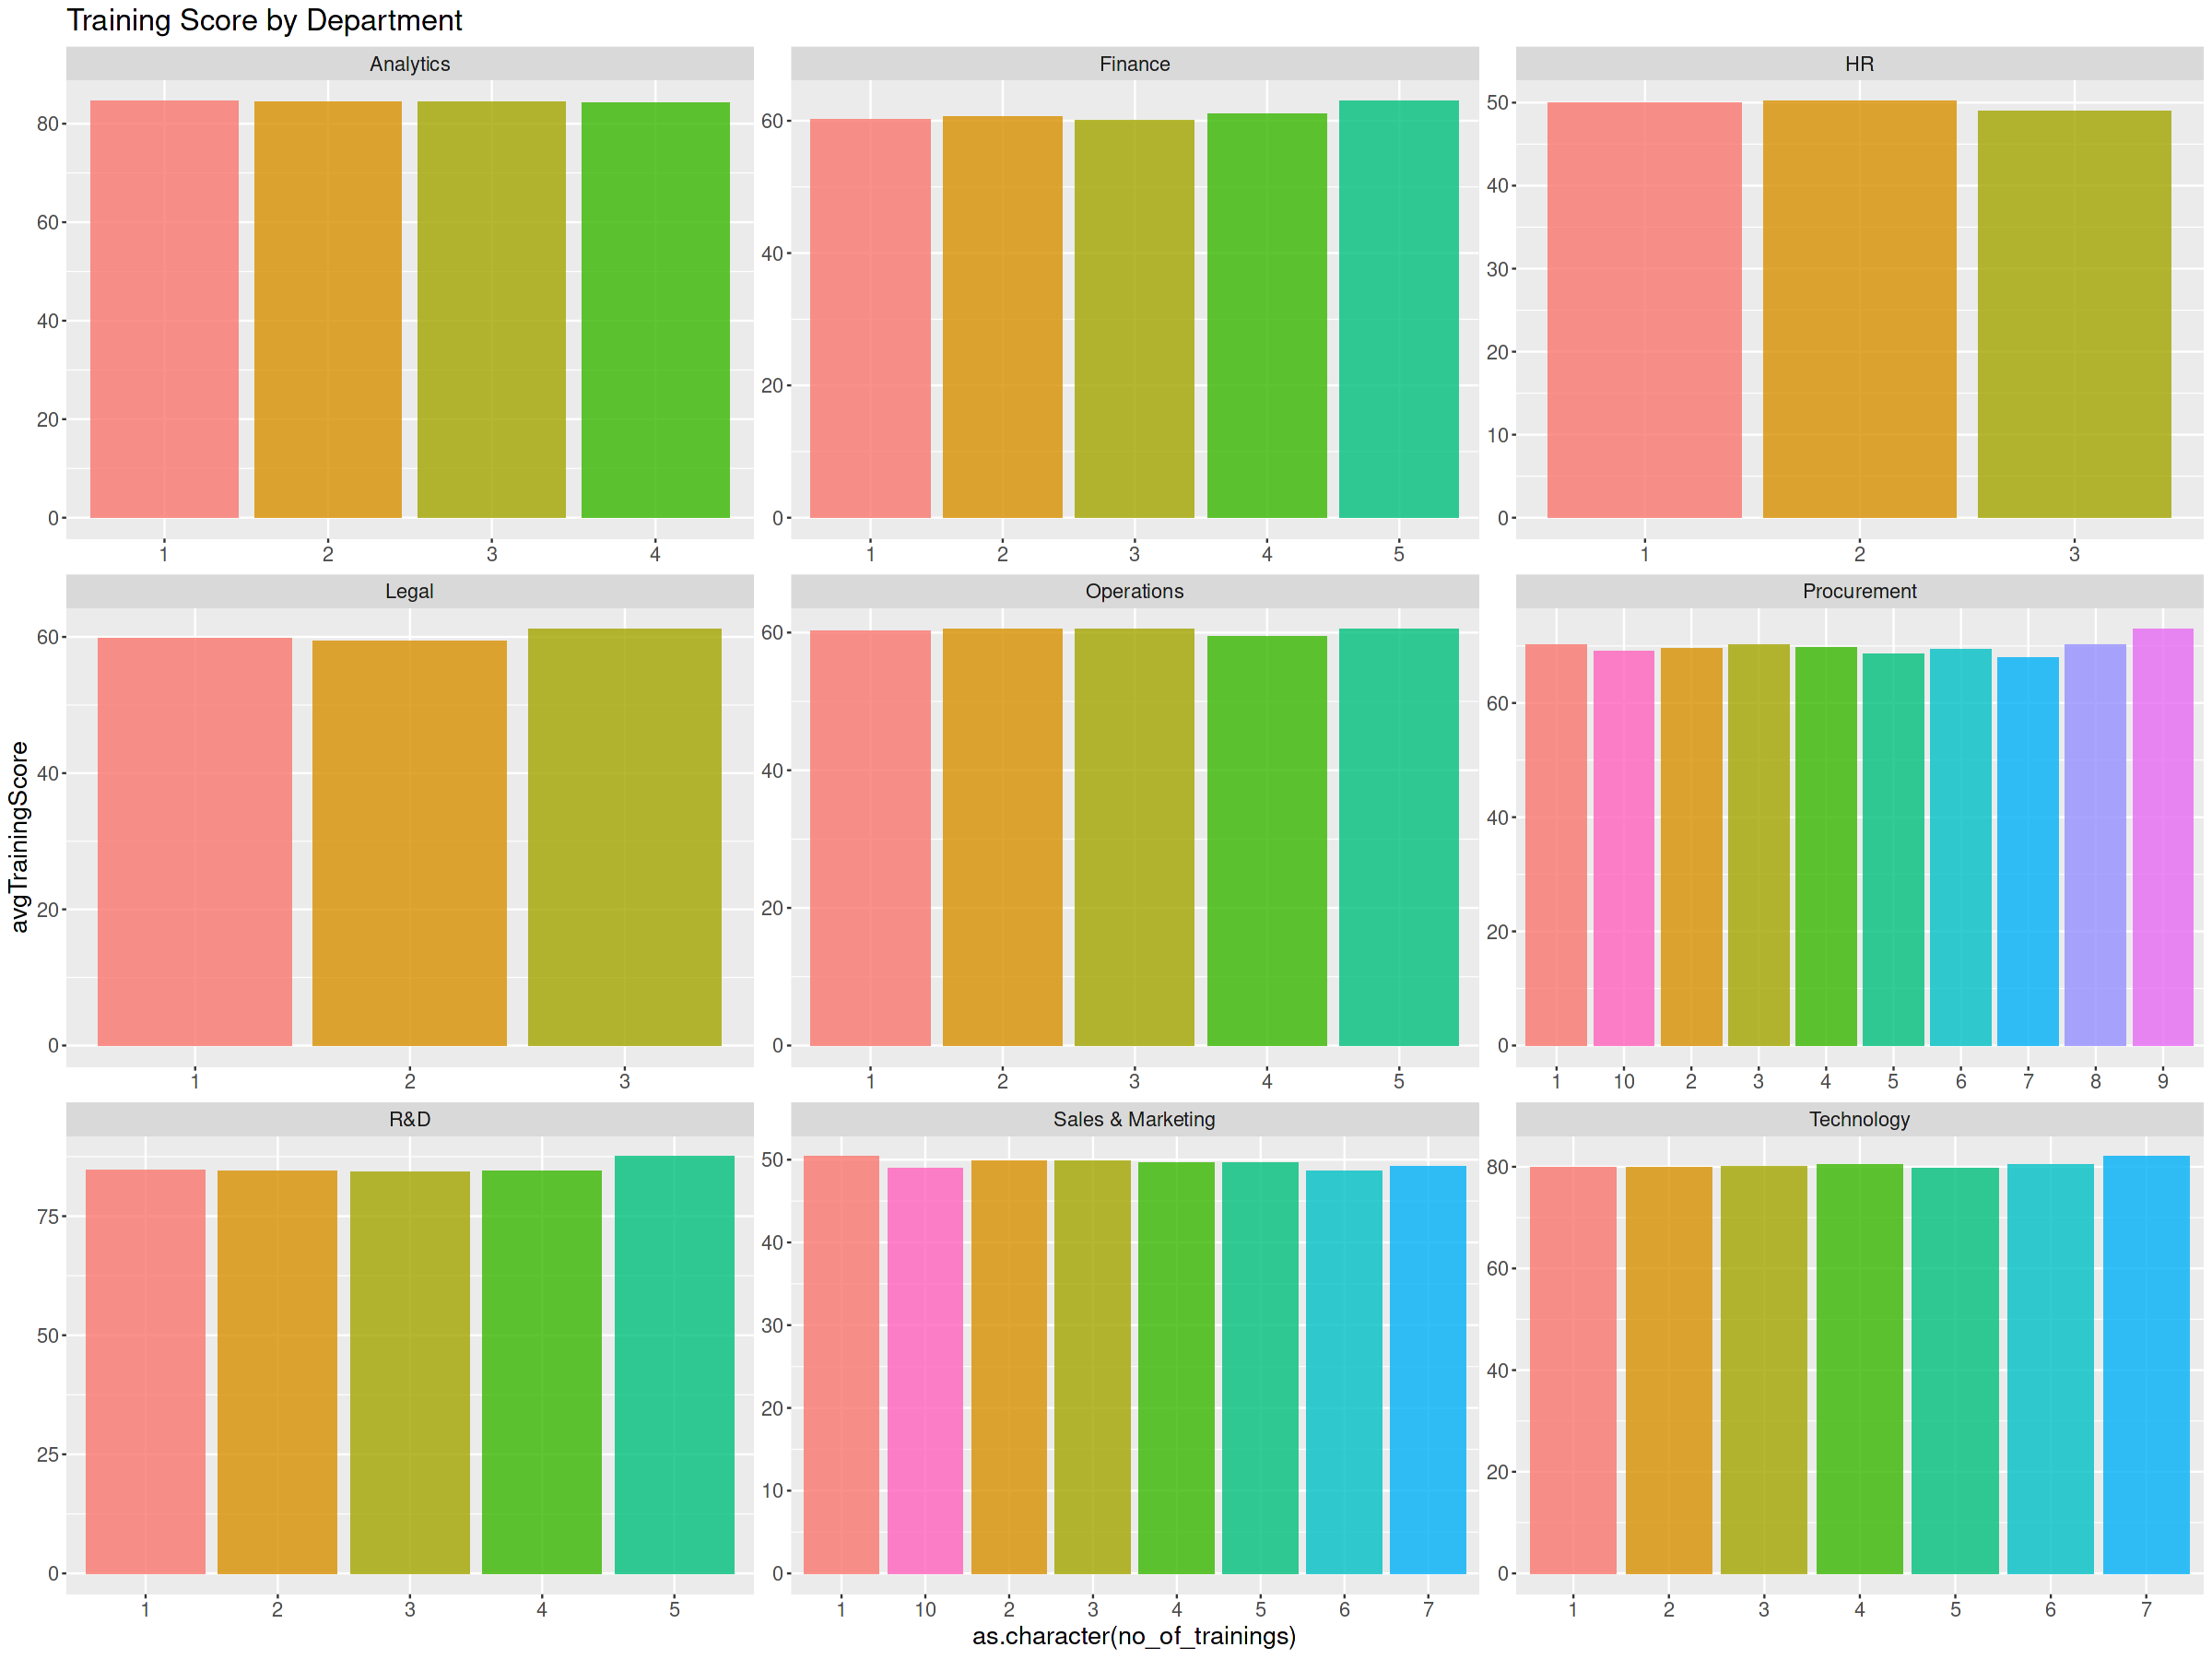

In [13]:
df %>% group_by(department,no_of_trainings) %>% summarize('avgTrainingScore'=round(mean(avg_training_score),2)) %>% 
ggplot(aes(as.character(no_of_trainings),avgTrainingScore,fill=factor(no_of_trainings)))+geom_col(alpha=.8)+facet_wrap('department',ncol=3,scales='free')+
theme(text=element_text(size=16),legend.position='none')+labs(title='Training Score by Department')
# We can see Analytics and Technology gain the best training score, that means they are better to absorb the knowledge and achieve the learning targets.
# The next step is to research the reasons why the rest departments couldn't achieve the learning goals. Is it the course difficult or boring for the learner? or Is the learner not proactive to study the course? etc.

In [14]:
names(df)

[1] "employee_id"          "department"           "region"              
 [4] "education"            "gender"               "recruitment_channel" 
 [7] "no_of_trainings"      "age"                  "previous_year_rating"
[10] "length_of_service"    "KPIs_met >80%"        "awards_won?"         
[13] "avg_training_score"   "is_promoted"

In [15]:
df %>% group_by(department) %>% summarize(mean(length_of_service),mean(`awards_won?`))
# It tells us that wining awards is not associated with the length of service, which means, there are no awards to highlight the loyality to the company.
# it's hard to say it will make good or bad impact on the company in the long run, if focus on outstanding performance/special contribution to team only currently.
# For the newly hired at young age who work in the company for several years and become fit for the work role, it's recommend to courage loyality and incentise them via awards.

department,mean(length_of_service),mean(`awards_won?`)
<chr>,<dbl>,<dbl>
Analytics,5.381562,0.02364425
Finance,5.304642,0.02613790
HR,6.212885,0.01867414
Legal,5.301038,0.02652826
Operations,6.731772,0.02370342
Procurement,6.668725,0.02409276
R&D,4.937290,0.02127660
Sales & Marketing,6.449961,0.02106890
Technology,6.321132,0.02568440


In [16]:
df %>% group_by(department) %>% summarize('avgRating'=round(mean(previous_year_rating),1)) # Currently, the majority employees are competent for their roles in the view of average rating above 3 overal last year.

department,avgRating
<chr>,<dbl>
Analytics,3.6
Finance,3.5
HR,3.5
Legal,3.4
Operations,3.6
Procurement,3.3
R&D,3.6
Sales & Marketing,3.1
Technology,3.2


`summarise()` has grouped output by 'department'. You can override using the
`.groups` argument.
`geom_smooth()` using formula = 'y ~ x'


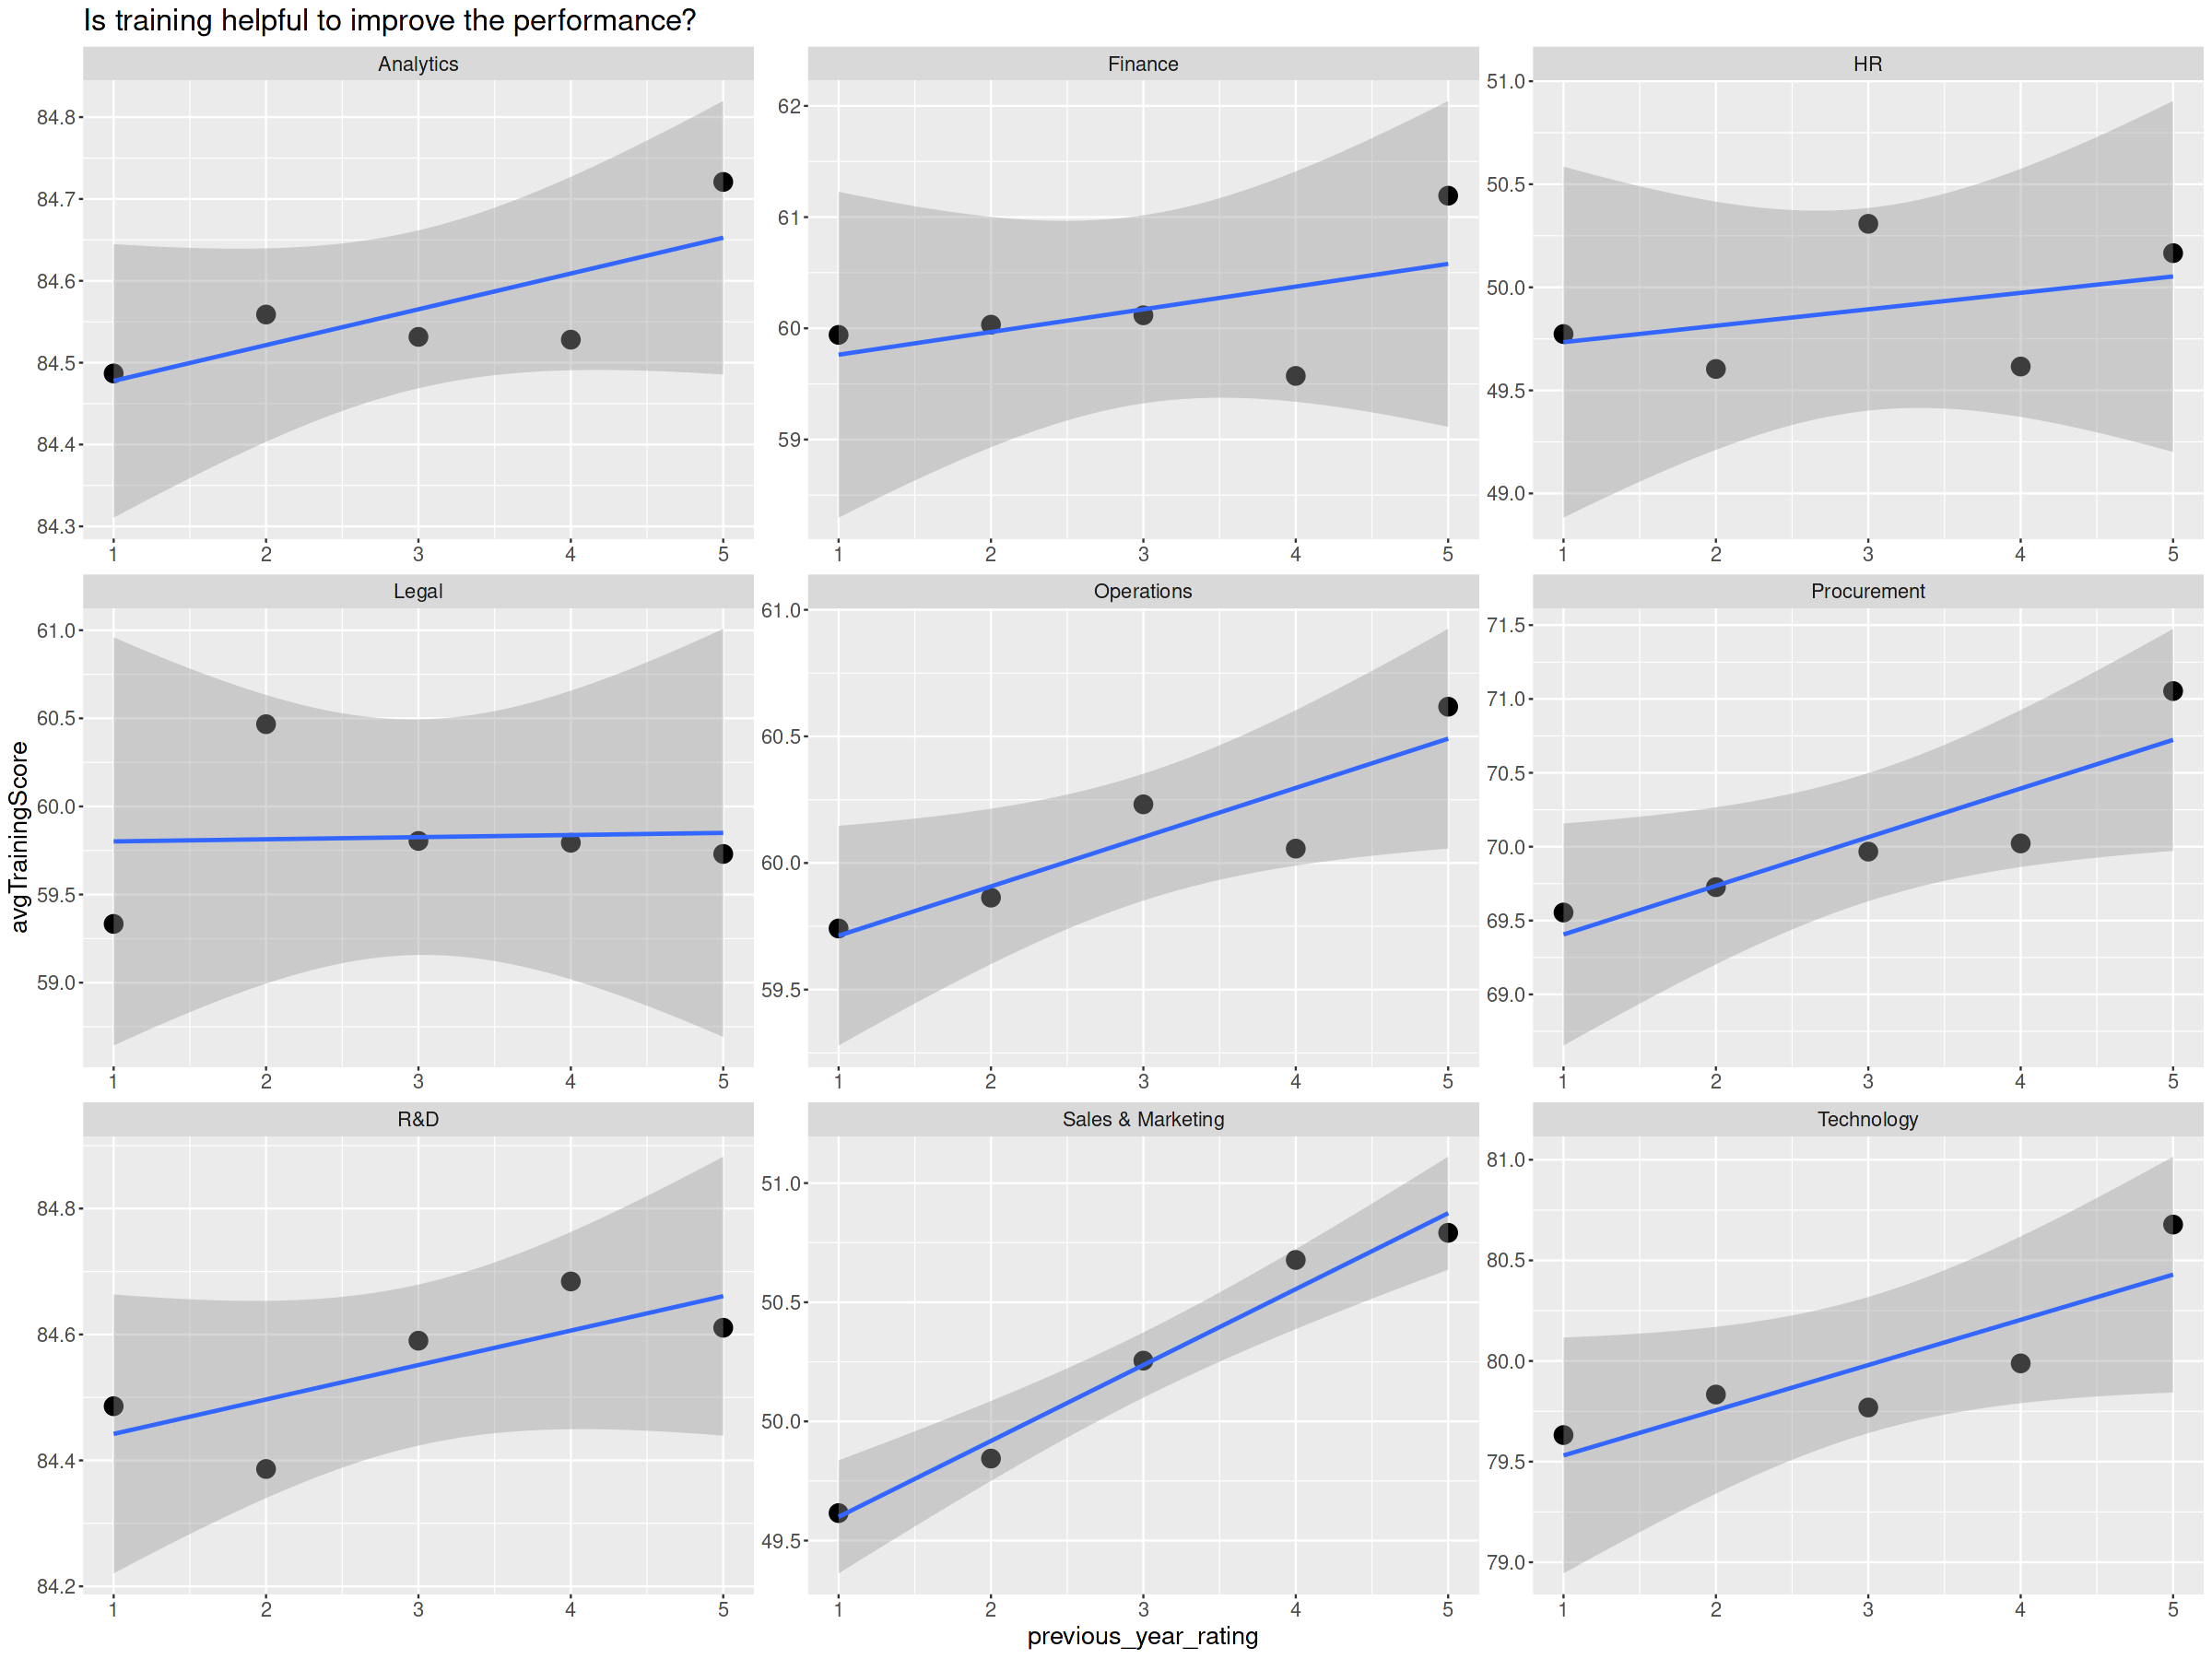

In [17]:
df %>% group_by(department,previous_year_rating) %>% summarize('avgTrainingScore'=mean(avg_training_score)) %>%
ggplot(aes(previous_year_rating,avgTrainingScore))+geom_point(size=5)+facet_wrap('department',ncol=3,scales='free')+theme(text=element_text(size=16))+
labs(title='Is training helpful to improve the performance?')+geom_smooth(method='lm')
# The training is helpful for the Sales&Market/Procurement/Technology,as their performance improved along with the training score,especially Sales&Marketing.
# For the rest departments, we probably introduce other ways to improve performance as training didn't much helpful to them.

In [18]:
df %>% select_if(is.numeric) %>% cor() 
# Which factors determine the promotion of an employee? 1. KPI must be above 80% 2. Average training score must be excellent 3.Gain awards as much as possible in the company.

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.0000000000,-0.005664550,0.0002600282,0.004465296,0.001644151,0.001215486,0.008882952,0.0009453136,0.002306482
no_of_trainings,-0.0056645498,1.000000000,-0.0835897025,-0.064236060,-0.055440252,-0.046672577,-0.008527796,0.0420325008,-0.025005565
age,0.0002600282,-0.083589702,1.0000000000,0.005067568,0.620348318,-0.033886066,-0.010335353,-0.0662137355,-0.022412430
previous_year_rating,0.0044652961,-0.064236060,0.0050675676,1.000000000,-0.001251998,0.352434017,0.027920374,0.0700405998,0.158715017
length_of_service,0.0016441514,-0.055440252,0.6203483182,-0.001251998,1.000000000,-0.089080664,-0.043750341,-0.0474608256,-0.014266981
KPIs_met >80%,0.0012154858,-0.046672577,-0.0338860659,0.352434017,-0.089080664,1.000000000,0.095207673,0.0741135085,0.219933147
awards_won?,0.0088829516,-0.008527796,-0.0103353531,0.027920374,-0.043750341,0.095207673,1.000000000,0.0731321468,0.196970570
avg_training_score,0.0009453136,0.042032501,-0.0662137355,0.070040600,-0.047460826,0.074113509,0.073132147,1.0000000000,0.179494390
is_promoted,0.0023064822,-0.025005565,-0.0224124299,0.158715017,-0.014266981,0.219933147,0.196970570,0.1794943902,1.000000000


### Classification_Linear Regression

In [19]:
promo <- df %>% select(c('previous_year_rating','KPIs_met >80%','awards_won?','avg_training_score','is_promoted'))
dim(promo)

[1] 48660     5

In [20]:
set.seed(100) # for reproducible purpose
trai <- sample(nrow(promo),nrow(promo)*0.8,replace=TRUE)
trai[1:10]
trainset <- promo[trai,]
testset <- promo[-trai,]
dim(trainset)
dim(testset)

[1] 16887  3696 31705 24270 11159 26116 43846 23431 45239 46584

[1] 38928     5

[1] 21823     5

In [21]:
set.seed(101)
lr <- lm(is_promoted~.,data=trainset)
summary(lr)


Call:
lm(formula = is_promoted ~ ., data = trainset)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56929 -0.12381 -0.05381  0.00256  1.01756 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.2207464  0.0073652  -29.97   <2e-16 ***
previous_year_rating  0.0186393  0.0011444   16.29   <2e-16 ***
`KPIs_met >80%`       0.0992570  0.0030241   32.82   <2e-16 ***
`awards_won?`         0.3112246  0.0088694   35.09   <2e-16 ***
avg_training_score    0.0031818  0.0001021   31.18   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2653 on 38923 degrees of freedom
Multiple R-squared:  0.1119,	Adjusted R-squared:  0.1118 
F-statistic:  1226 on 4 and 38923 DF,  p-value: < 2.2e-16


In [22]:
pred <- predict(lr,newdata=testset[,-5])
pred[1:5]
length(pred)

1          2          3          4          5 
0.06335662 0.10562257 0.02289633 0.11789827 0.13079582

[1] 21823

In [23]:
pred1 <- ifelse(pred>=0.5,1,0)
table(testset$is_promoted,pred1)

   pred1
        0     1
  0 19890    40
  1  1827    66

In [24]:
(19890+66)/nrow(testset) 
# linear regression model prediction accuracy is 91%, which means we can use linear regression to predict who should be potentially promoted on the basis of
# kpi assessment last year, training score,awards. It's good reference for managers and HR to consider the employees to be promoted.

[1] 0.9144481